In [3]:
#libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
import seaborn as sns
from sklearn.metrics import accuracy_score, classification_report , confusion_matrix 

In [4]:
data = pd.read_csv(r'C:\Users\mca\py_lab_064\ML_064\week9 KNN NB DT\KNN\weather.csv')
data.head()

outlook  temp humidity  windy play
0     sunny   hot     high  False   no
1     sunny   hot     high   True   no
2  overcast   hot     high  False  yes
3     rainy  mild     high  False  yes
4     rainy  cool   normal  False  yes

In [5]:
data.isnull().sum()

outlook     0
temp        0
humidity    0
windy       0
play        0
dtype: int64

In [6]:
target_column = 'play'
feature_columns = [col for col in data.columns if col != target_column]
X = data[feature_columns]
y = data[target_column]

In [7]:
X = pd.DataFrame(X, columns=feature_columns)

In [8]:
categorical_columns = [col for col in X.columns if X[col].dtype == 'object']
if categorical_columns:
    label_encoders = {}
    for col in categorical_columns:
        le = LabelEncoder()
        X[col] = le.fit_transform(X[col])
        label_encoders[col] = le

In [9]:
X

outlook  temp  humidity  windy
0         2     1         0  False
1         2     1         0   True
2         0     1         0  False
3         1     2         0  False
4         1     0         1  False
5         1     0         1   True
6         0     0         1   True
7         2     2         0  False
8         2     0         1  False
9         1     2         1  False
10        2     2         1   True
11        0     2         0   True
12        0     1         1  False
13        1     2         0   True

In [10]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)
knn = KNeighborsClassifier(n_neighbors=3)  
knn.fit(X_train, y_train)
y_pred = knn.predict(X_test)

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


In [11]:
accuracy = accuracy_score(y_test, y_pred )
accuracy

0.6

In [12]:
con_mat = confusion_matrix(y_test , y_pred )
con_mat

array([[1, 1],
       [1, 2]], dtype=int64)

<AxesSubplot:>

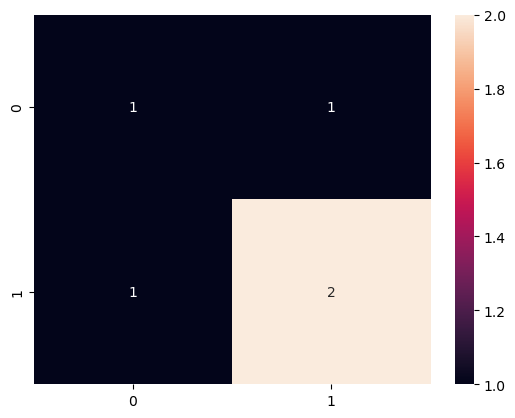

In [13]:
sns.heatmap(con_mat , annot = True)

In [15]:
testdata = {
    'outlook' : [2],
    'temp' : [1],
    'humidity' : [0],
    'windy': [1],
}
df5 = pd.DataFrame(testdata)
y_pred = knn.predict(df5)
y_pred

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\neighbors\_classification.py:228: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


array(['no'], dtype=object)